In [274]:
import pandas as pd
import re

In [275]:
file = open('../input/C249.txt','r')
number_of_strings  = 403
string=""
for i in range(6):
    string += file.readline()
s = re.findall('\d+ *\d*', string)
s2 = str.split(s[1], ' ')
max_vehicle_number = int(s2[0])
max_vehicle_capacity = int(s2[len(s2)-1])
print("MAX VEHICLE NUMBER: {}\nMAX VEHICLE CAPACITY: {}".format(max_vehicle_number, max_vehicle_capacity))
string = file.readline()
string.replace(string, '')
new_file = open('C108_new.csv', 'w+')
stri=file.readlines()
for i in range(number_of_strings):
    new_file.write(stri[i])
new_file.read()
file.close()
new_file.close()

MAX VEHICLE NUMBER: 100
MAX VEHICLE CAPACITY: 700


In [276]:
problem1 = pd.read_csv('C108_new.csv', sep="\s+ |\n" )
problem1['VISITED'] = 0
len(problem1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


401

In [277]:
customers_list_init = []
for i in range (len(problem1)):
    customers_list_init.append([problem1.iloc[i,0], problem1.iloc[i,1], problem1.iloc[i,2], problem1.iloc[i,3],\
                   problem1.iloc[i,4], problem1.iloc[i,5], problem1.iloc[i,6], problem1.iloc[i,7]])

depot = customers_list_init[0]
x = [x for [_,x,_,_,_,_,_,_] in customers_list_init]
y = [y for [_,_,y,_,_,_,_,_] in customers_list_init]


import matplotlib.pyplot as plt
#plt.figure(figsize=(10,8))
#plt.plot(x,y, marker = 'o', color = 'black', ls = '')
#plt.show()

In [278]:
import math
class Route:
    def __init__(self, customers: list, total_length = 0, current_time = 0, remaining_capacity = max_vehicle_capacity):
        self.customers = list(customers)
        self.total_length = 0
        self.current_time = 0
        self.remaining_capacity = int(max_vehicle_capacity)
        
    def __repr__(self):
        return "[" + " ".join(str(Number) for [Number,_,_,_,_,_,_,_] in self.customers) + "]"
    
    def path_between_customers(self, cust1, cust2):
        return math.hypot(cust2[1] - cust1[1], cust2[2] - cust1[2])
    
    @property
    def needed_view(self):
        time = 0
        result = [0, 0.0]
        depot = customers_list_init[0]
        for depot, customer in zip(self.customers, self.customers[1:]):
            start_time = max([customer[4], time + self.path_between_customers(depot, customer)])
            time = start_time + customer[6]
            result.append(customer[0])
            result.append(start_time)
        return " ".join(str(res) for res in result)

In [279]:
  def may_be_a_route(route):
        route.remaining_capacity = max_vehicle_capacity
        route.total_length = 0
        time = 0
        depot = customers_list_init[0]
        for cust1, cust2 in zip(route.customers, route.customers[1:]):
            accumulated_time = max([cust2[4], time + route.path_between_customers(cust1, cust2)])
            if accumulated_time > cust2[5]:
                return False
            time = accumulated_time + cust2[6]
            route.remaining_capacity -= cust2[3]
            route.total_length += route.path_between_customers(cust1, cust2)
            if route.remaining_capacity < 0 or time > depot[5]:
                return False
        return True

##Deprecated

def could_be_in_route(customer, route: Route):
    number = customer[0]
    x = customer[1]
    y = customer[2]
    demand = customer[3]
    rdy_time = customer[4]
    due_date = customer[5]
    serv_time = customer[6]
    visited = customer[7]
    
    travel_distance = math.hypot(x - route.customers[-1][1], y - route.customers[-1][2])
    with_travel_time = route.current_time + travel_distance
    #print("TRY ADD Cust {} to the route: [{}]".format(customer[0], route))
    #print("With travel Time: {}\n DUE_DATE: {}".format(with_travel_time, due_date))
    if with_travel_time < float(due_date) and route.remaining_capacity > demand and visited == 0:
        route.current_time = max(rdy_time, with_travel_time) + serv_time
        route.remaining_capacity -= demand
        route.customers.append(customer)
        route.total_length += travel_distance
        visited += 1
        problem.at[number,'VISITED'] += 1
        return True
    else:
        return False

In [280]:
import numpy as np
def dummy_shit(customers, problem):
    routes = [Route([]) for i in range(22)]
    depot = customers_list_init[0]
   # for route in routes:
   #     route.customers.append(depot)
    customers.sort(key = lambda x: x[4])
    for i in range(1,len(customers)):
        cust = customers[i]
        '''
        distances = [calculate_distance(customer[1:3], customers[edge_point], customers[0]) \
                for edge_point in start_directions]
        print(distances)
        is_inserted = False
        number = 0
        preffered_route = 0
        for i in range(len(routes)):
            preffered_route = np.argmin(distances)
            concrete_route = routes[preffered_route]
            is_inserted = could_be_in_route(customer, concrete_route)
            distances[preffered_route] = 99999 
            number += 1
            if is_inserted:
                break
        if not is_inserted:    
            print("Customer {} sucks".format(customer[0]))
        ''' 
        
        for route in routes:
            new_customers = route.customers + [cust]
            if may_be_a_route(Route([depot, *new_customers, depot])) and cust[7] == 0:
                cust[7] = 1
                problem.at[cust[0],'VISITED'] += 1
                route.customers.append(cust)
    #for route in routes:
    #    route.customers.append(depot)
        
    return routes

In [281]:
def plot_solution(routes):
    plt.figure(figsize=(10,8))
    plt.plot(x,y, marker = 'o', color = 'black', ls = '')
    for route in routes:
        route = Route([depot, *route.customers, depot])
        print("Route:{}\n".format(route))
        for i in range(len(route.customers)):
            x1 = [X for [_,X,_,_,_,_,_,_] in route.customers]
            y1 = [Y for [_,_,Y,_,_,_,_,_] in route.customers]
            plt.plot(x1, y1)
    
    plt.show()

Route:[0 75 162 213 324 296 391 216 115 174 170 144 191 325 239 369 93 194 352 148 123 3 77 92 98 242 52 0]

Route:[0 25 15 238 49 371 137 211 147 127 329 60 339 373 386 59 229 308 336 343 118 126 368 0]

Route:[0 31 383 252 276 62 222 355 345 84 9 124 117 268 68 245 134 10 305 158 315 76 0]

Route:[0 21 331 225 89 240 189 154 34 321 358 163 293 165 375 113 184 5 47 207 109 70 48 361 0]

Route:[0 256 269 367 290 36 53 298 302 97 182 190 29 26 32 4 261 153 38 209 257 99 0]

Route:[0 323 235 372 1 146 309 387 377 110 284 157 204 39 11 87 80 330 63 381 16 314 72 0]

Route:[0 166 35 20 192 105 104 313 23 149 212 151 274 237 311 327 399 273 43 66 277 90 82 390 0]

Route:[0 175 203 177 337 292 133 51 128 171 28 295 241 200 306 41 301 289 167 354 340 255 0]

Route:[0 37 379 341 218 73 140 275 370 18 178 83 350 141 193 199 102 281 91 342 364 57 266 288 0]

Route:[0 64 262 67 27 253 353 100 156 389 44 304 384 46 382 13 8 121 366 111 61 396 0]

Route:[0 362 335 22 119 2 347 359 180 172 103 206 1

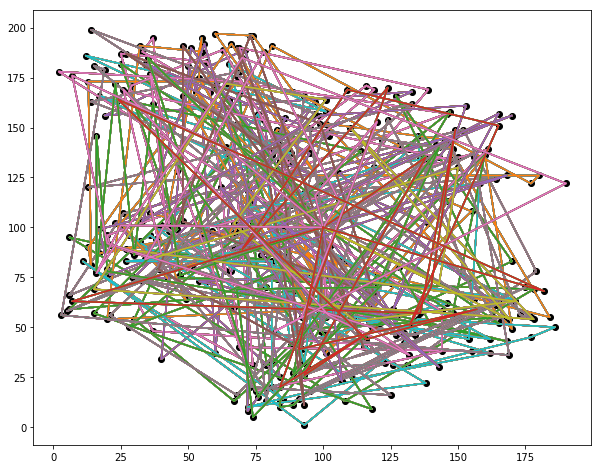

In [282]:
customers_dummy = list(customers_list_init)
routes_dummy = dummy_shit(customers_dummy, problem1)
plot_solution(routes_dummy)

In [283]:
check2 = []
for route in routes_dummy:
    check2.append(may_be_a_route(route))
print(check2)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [284]:
for route in routes_dummy:
    print(Route([depot, *route.customers, depot]).needed_view)

0 0.0 75 9.486832980505138 162 122.33415229809687 213 220.3964100463954 324 344.3669855493215 296 436.60305352682127 391 564.2461139762586 216 693.0790896541538 115 794.0790896541538 174 920.3144315181406 170 1059.1508933064397 144 1150.5651068688128 191 1253.3713553436785 325 1401.971696639613 239 1549.2778917671906 369 1731.5871545743435 93 1903.8671642972404 194 2149.176532977948 352 2284.7945118897765 148 2507.6101736168484 123 2673.5706896761803 3 2830.749555400454 77 2925.749555400454 92 3089.4109428432657 98 3208.957516248654 242 3304.6143704981464 52 3465.0700303133804 0 3622.8490831247027
0 0.0 25 27.892651361962706 15 169.63238464306883 238 307.14027872394763 49 461.2729537032435 371 631.87692382879 137 769.4163811248089 211 939.7407236369017 147 1112.5960191828112 127 1291.798037097206 329 1497.0455967242974 60 1674.618423560023 339 1888.5942276509827 373 2023.3155872009786 386 2210.48554140494 59 2432.674799667478 229 2566.091386359663 308 2707.081581495591 336 2827.7573047

In [285]:
def object_function(routes):
    total_path = 0
    for route in routes:
        route = Route([depot, *route.customers, depot])
        may_be_a_route(route)
        total_path += route.total_length
    return total_path

In [286]:
object_function(routes_dummy)

30808.746622643608

In [287]:
def make_check(problem):
    check = []
    for i in range(len(problem)):
        check.append(problem.iloc[i,7])
    print(check)
    assert len(np.unique(check[1:])) == 1
    problem['VISITED'] = 0
    assert len(np.unique(check[1:])) == 1

In [288]:
make_check(problem1)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [289]:
'''
def two_opt(cust_l, cust1, cust2):
    return cust_l[0:cust1] + [cust_l[cust2]] + cust_l[cust1 + 1:cust2] + [cust_l[cust1]] + cust_l[cust2+1:]
'''
def two_opt(cust_l, c1,c2):
    if c1 == 0:
        return cust_l[c2:c1:-1] + [cust_l[c1]] + cust_l[c2+1:]
    return cust_l[:c1] + cust_l[c2:c1-1:-1] + cust_l[c2+1:]

#def one_move_r(cust_l, c1,c2):
    #c1 insted of c2
    #return cust_l[:c2] + 

In [290]:
two_opt([0,1,2,3,4,5,0],2,4)

[0, 1, 4, 3, 2, 5, 0]

In [291]:
from itertools import combinations

def local_search(dummy_solution, problem):
    depot = customers_list_init[0]
    solution = list(dummy_solution)
    for i in range(len(solution)):
        cant_optimize = False
        while not cant_optimize:
            route_for_optimize = solution[i]
            may_be_a_route(route_for_optimize)
            cant_optimize = True
            for j,k in combinations(range(len(route_for_optimize.customers)),2):
                '''
                1 2 3 4 ... 9  -> 1 2 3 ... 9 8 
                '''
                #local optimization with neighborhoods that involve changing up to k components 
                #of the solution is often referred to as k-opt. 
                new_route = two_opt(route_for_optimize.customers, j, k)
                '''
                0 1 2 3 4 5 0 -> 0 1 4 3 2 5 0  j = 2, k = 4    
                '''    
                new_route = Route(new_route)
                new_route_w_depot = Route([depot, *new_route.customers, depot])
                if may_be_a_route(new_route_w_depot):
                    route_for_optimize_w_depot = Route([depot, *route_for_optimize.customers, depot])
                    may_be_a_route(route_for_optimize_w_depot)
                   # print(new_route_w_depot.total_length, route_for_optimize_w_depot.total_length)
                    if new_route_w_depot.total_length < route_for_optimize_w_depot.total_length:
                        solution[i] = new_route
                        cant_optimize = False
    return solution

Route:[0 75 296 324 162 213 391 174 325 216 170 144 191 115 239 93 369 194 352 148 123 3 77 92 98 242 52 0]

Route:[0 25 238 371 127 137 15 49 211 147 60 386 329 373 339 126 336 229 368 59 308 343 118 0]

Route:[0 31 252 383 276 222 62 355 9 84 345 268 124 117 245 305 68 134 10 158 315 76 0]

Route:[0 21 225 331 89 240 189 34 154 321 358 163 293 375 165 113 5 184 207 47 70 48 361 109 0]

Route:[0 256 367 290 298 53 36 269 97 302 182 26 190 29 32 4 257 261 153 38 99 209 0]

Route:[0 323 372 1 309 235 146 387 110 377 157 284 39 204 63 381 11 87 80 330 314 16 72 0]

Route:[0 166 20 35 313 192 105 104 23 149 212 151 237 274 311 327 273 399 66 43 277 90 82 390 0]

Route:[0 175 203 133 337 177 292 171 51 128 28 295 41 241 306 200 301 289 167 340 354 255 0]

Route:[0 37 218 341 379 73 178 140 275 370 18 83 350 141 193 199 102 91 342 281 57 288 364 266 0]

Route:[0 64 262 27 253 67 353 100 156 44 389 46 384 304 382 121 13 8 366 396 111 61 0]

Route:[0 335 362 119 22 2 347 359 180 172 103 206 1

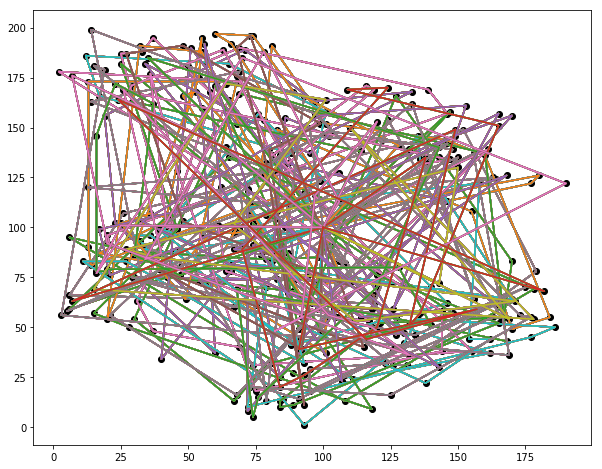

In [292]:
routes_optimized1 = local_search(routes_dummy, problem1)
for route in routes_optimized1:
    for cust in route.customers:
        cust[7] += 1
        problem1.at[cust[0],'VISITED'] += 1
plot_solution(routes_optimized1)

In [293]:
make_check(problem1)
object_function(routes_optimized1)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

25348.792270440666

In [294]:
def one_move(route1, route2, customer_index, position):
    if len(route1.customers) == 0:
        return [], route2.customers
    if customer_index > len(route1.customers) or position  > len(route2.customers):
        return route1.customers, route2.customers
    if customer_index != len(route1.customers):
        return route1.customers[:customer_index] + route1.customers[customer_index + 1:], route2.customers[:position] + [route1.customers[customer_index]] + route2.customers[position:]
    elif customer_index == len(route1.customers) and position == len(route2.customers):
        return route1.customers, route2.customers
    elif customer_index == len(route1.customers):
        return route1.customers[:customer_index], route2.customers[:position] + [route1.customers[customer_index-1]] + route2.customers[position:]
    elif position == len(route2.customers):
        return route1.customers[:customer_index] + route1.customers[customer_index + 1:], route2.customers[:position] + [route1.customers[customer_index]]

def swap(route1, route2, cust1, cust2):
    if cust1 >= len(route1.customers) or cust2 >= len(route2.customers):
        return route1.customers, route2.customers
    return route1.customers[:cust1] + [route2.customers[cust2]] + route1.customers[cust1 + 1:], route2.customers[:cust2] + [route1.customers[cust1]] + route2.customers[cust2 + 1:]

def cross(route1, route2, i, j):
    return route1.customers[:i] + route2.customers[j:], route2.customers[:j] + route1.customers[i:]

In [295]:
one_move(Route([1,2,3,4,5]), Route([6,7,8]), 4, 2)

([1, 2, 3, 4], [6, 7, 5, 8])

In [296]:
import itertools
import random
def perturbation(routes):
    depot = customers_list_init[0]
    best_result = [Route(route.customers) for route in routes]
    cant_be_optimized = False
    oper = [one_move,swap, cross]
    while not cant_be_optimized:
        for r in best_result:
            may_be_a_route(r)
        cant_be_optimized = True
        for r1, r2 in itertools.combinations(range(len(best_result)),2):
            #all routes
            for i in range(len(best_result[r1].customers)):
                for j in range(len(best_result[r2].customers)):
                    #all customers indices in routes
                    random.shuffle(oper)
                    for pert in oper:
                        cust1, cust2 = pert(best_result[r1],best_result[r2],i,j)
                        new_r1 = Route(cust1)
                        new_r2 = Route(cust2)
                        new_r1_w_depot = Route([depot, *cust1, depot])
                        new_r2_w_depot = Route([depot, *cust2, depot])
                        if may_be_a_route(new_r1_w_depot) and may_be_a_route(new_r2_w_depot):
                            best_result_r1_w_depot = Route([depot, *best_result[r1].customers, depot])
                            best_result_r2_w_depot = Route([depot, *best_result[r2].customers, depot])
                            may_be_a_route(best_result_r1_w_depot)
                            may_be_a_route(best_result_r2_w_depot)
                            if new_r1_w_depot.total_length + new_r2_w_depot.total_length < best_result_r1_w_depot.total_length + best_result_r2_w_depot.total_length:
                                        best_result[r1] = new_r1
                                        best_result[r2] = new_r2
                                        cant_be_optimized = False
    return best_result
    
def iterated_local_search(customers, problem):
    #initial_solution = dummy_shit(customers, problem)
    #plot_solution(initial_solution)
    
    #best_result = local_search(initial_solution, problem)
    #plot_solution(best_result)  
    best_result = routes_optimized1
    for r in best_result:
        may_be_a_route(r)
    print(object_function(best_result))
    for i in range(5):
        print("Step {}".format(i))
        solution = perturbation(best_result)
        for r in solution:
            may_be_a_route(r)
        #plot_solution(solution)
        solution = local_search(solution, problem)
        for r in solution:
            may_be_a_route(r)
            #print(r.total_length)
        plot_solution(solution)
        print(object_function(solution))
        if object_function(solution) <= object_function(best_result):
            best_result = solution
            print("Dist: {}".format(object_function(best_result)))
    return best_result

25348.792270440666
Step 0
Route:[0 262 124 293 182 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 177 133 119 140 345 309 265 288 328 366 0]

Route:[0 21 370 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 205 29 297 19 319 396 150 0]

Route:[0 184 232 143 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 78 10 168 310 0]

Route:[0 238 129 362 330 392 96 221 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 27 325 100 284 2 357 275 212 151 283 352 237 260 158 87 226 80 59 308 307 259 72 88 16 0]

Route:[0 

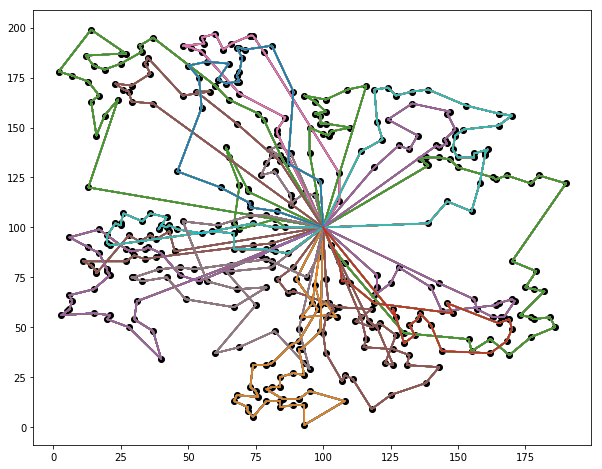

4989.59671616082
Dist: 4989.59671616082
Step 1
Route:[0 262 124 293 182 330 392 96 340 99 0]

Route:[0 177 133 119 250 18 140 120 274 26 299 196 268 326 368 318 38 364 16 0]

Route:[0 21 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 297 29 205 143 232 184 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 27 19 319 396 150 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 10 78 310 0]

Route:[0 238 129 362 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 325 370 100 2 275 357 284 7 212 151 283 352 237 260 1

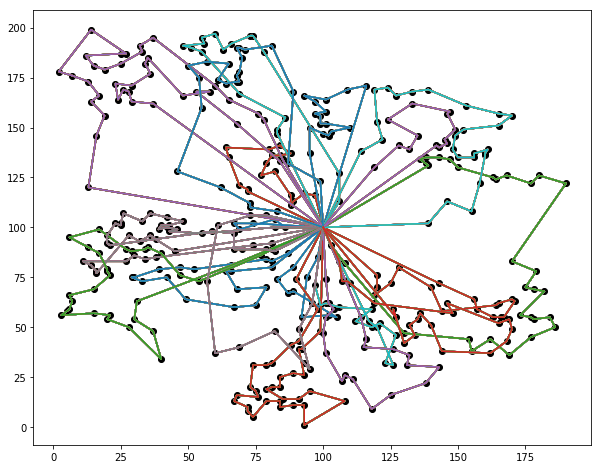

4892.568595800048
Dist: 4892.568595800048
Step 2
Route:[0 262 124 293 182 330 392 96 340 99 0]

Route:[0 177 133 119 250 18 140 120 274 26 299 196 268 326 368 318 38 364 16 0]

Route:[0 21 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 297 29 205 143 232 184 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 27 19 319 396 150 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 10 78 310 0]

Route:[0 238 129 362 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 325 370 100 2 275 357 284 7 212 151 283 352 237 260

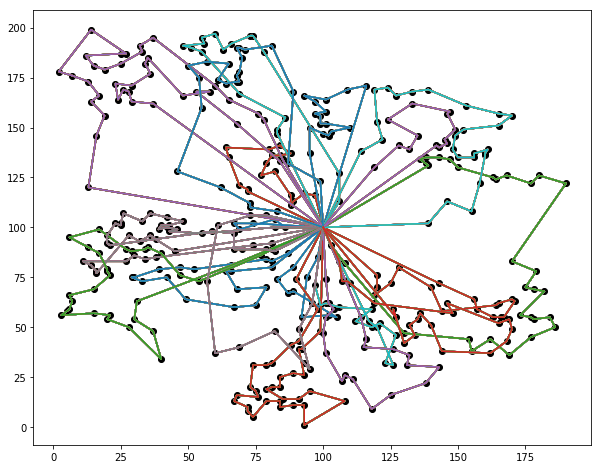

4892.568595800048
Dist: 4892.568595800048
Step 3
Route:[0 262 124 293 182 330 392 96 340 99 0]

Route:[0 177 133 119 250 18 140 120 274 26 299 196 268 326 368 318 38 364 16 0]

Route:[0 21 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 297 29 205 143 232 184 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 27 19 319 396 150 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 10 78 310 0]

Route:[0 238 129 362 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 325 370 100 2 275 357 284 7 212 151 283 352 237 260

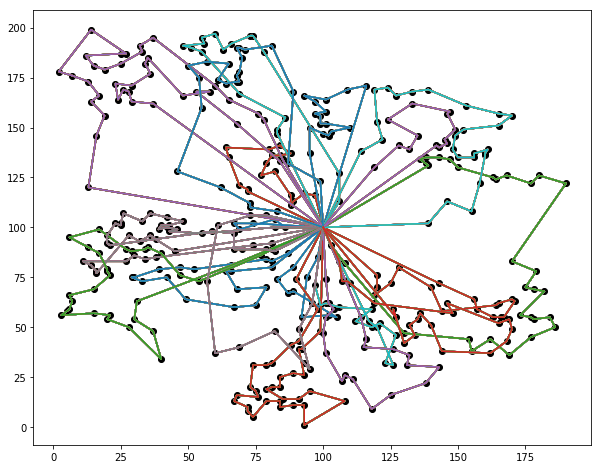

4892.568595800048
Dist: 4892.568595800048
Step 4
Route:[0 262 124 293 182 330 392 96 340 99 0]

Route:[0 177 133 119 250 18 140 120 274 26 299 196 268 326 368 318 38 364 16 0]

Route:[0 21 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 297 29 205 143 232 184 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 27 19 319 396 150 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 10 78 310 0]

Route:[0 238 129 362 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 325 370 100 2 275 357 284 7 212 151 283 352 237 260

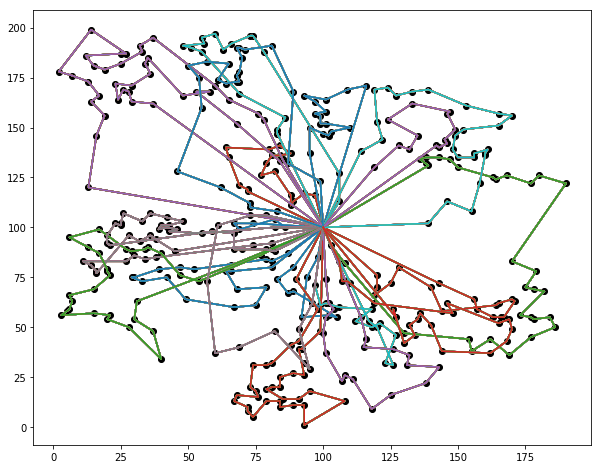

4892.568595800048
Dist: 4892.568595800048


In [297]:
answer = iterated_local_search(customers_dummy, problem1)


Route:[0 262 124 293 182 330 392 96 340 99 0]

Route:[0 177 133 119 250 18 140 120 274 26 299 196 268 326 368 318 38 364 16 0]

Route:[0 21 240 189 154 34 54 136 399 281 57 376 161 215 76 255 0]

Route:[0 115 37 276 225 367 290 235 227 180 263 287 298 83 295 169 14 304 384 46 173 102 4 228 220 91 400 342 79 315 257 356 320 138 294 0]

Route:[0 28 351 297 29 205 143 232 184 245 219 155 336 217 195 246 98 242 363 0]

Route:[0 27 19 319 396 150 0]

Route:[0 239 211 292 36 192 175 348 374 149 277 85 43 332 90 56 301 176 0]

Route:[0 49 62 89 323 64 110 105 377 156 50 198 113 157 202 142 206 95 327 5 223 10 78 310 0]

Route:[0 238 129 362 302 114 65 17 382 33 230 77 317 314 0]

Route:[0 337 372 53 1 203 67 104 224 353 264 139 190 385 194 278 306 214 267 229 273 261 200 30 153 207 303 145 344 354 92 266 0]

Route:[0 51 333 188 171 152 210 339 185 397 251 375 68 12 279 316 322 0]

Route:[0 162 325 370 100 2 275 357 284 7 212 151 283 352 237 260 158 87 226 80 59 308 307 259 72 88 0]

Route:[0 

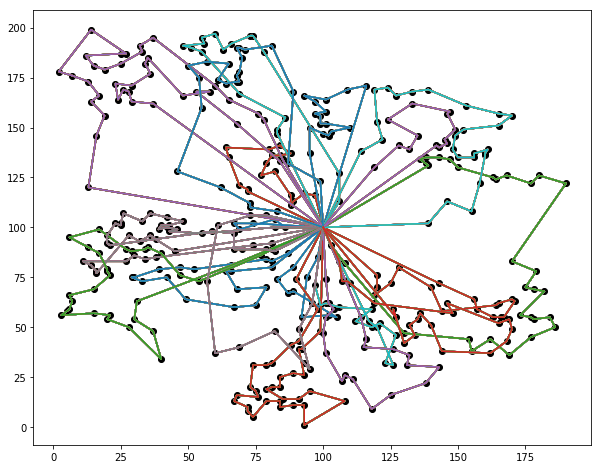

In [298]:
plot_solution(answer)

In [299]:
for r in answer:
    r = Route([depot, *r.customers, depot])
    print(may_be_a_route(r))
    print(r.total_length)

True
121.43953973737347
True
207.99462524350798
True
202.04620435684117
True
310.7080227912981
True
153.7278522899744
True
70.26760342295108
True
255.2101166688109
True
369.2155870643399
True
178.16993679069833
True
330.275721978846
True
198.64214360644502
True
215.94271833270452
True
262.7508997115305
True
206.93183772898823
True
234.3072317497238
True
225.5570069497117
True
0.0
True
351.79412729668286
True
275.6029919832815
True
184.32572286341065
True
280.6951014453333
True
256.9636037875943


In [300]:
object_function(answer)

4892.568595800048

In [301]:
for route in answer:
    for cust in route.customers:
        cust[7] += 1
        problem1.at[cust[0],'VISITED'] += 1
make_check(problem1)
object_function(answer)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

4892.568595800048

In [302]:
for route in answer:
    print(Route([depot, *route.customers, depot]).needed_view)

0 0.0 262 219 124 573 293 671.0622577482985 182 763.2983257257983 330 1751 392 2165 96 2711 340 2821.099751242242 99 2921.870080856511 0 3027.0028268069323
0 0.0 177 125 133 256 119 442 250 1085 18 1186.0453610171874 140 1285.8942188189835 120 1383.9564765672822 274 1492.3955654818678 26 1595.4339702922732 299 1694.653514749566 196 1789.1256507045657 268 1880.1256507045657 326 2625 368 2723.0622577482986 318 2818.1612772618914 38 2935.6203376973835 364 3027.8564056748833 16 3125.0675082258113 0 3233.4522845366614
0 0.0 21 56.293871780150276 240 155.51341623744318 189 248.34184336218937 154 343.34184336218937 34 438.34184336218937 54 1534 136 2034 399 2127.6055512754638 281 2221.2111025509275 57 2327.2111025509275 376 2558 161 2779 215 2873.123105625618 76 2999.6196808074073 255 3096.6907486192727 0 3207.306276747361
0 0.0 115 27.85677655436824 37 134.85677655436825 276 242.32102575094123 225 335.9265770264052 367 437.32833127739656 290 529.5643992548963 235 624.5643992548963 227 725.60

In [303]:
C108
Route:[0 20 24 27 29 30 28 26 22 21 0]

Route:[0 13 15 19 16 14 12 0]

Route:[0 41 40 53 56 58 60 59 68 69 0]

Route:[0 32 33 31 35 37 38 39 36 34 0]

Route:[0 81 78 76 71 70 73 77 79 80 0]

Route:[0 43 42 44 46 45 48 51 50 52 49 47 0]

Route:[0 10 8 11 9 6 4 2 1 75 0]

Route:[0 25 17 18 23 0]

Route:[0 57 54 55 64 66 0]

Route:[0 98 96 95 94 92 93 97 100 99 0]

Route:[0 90 87 86 83 82 84 85 88 89 91 0]

Route:[0 67 65 63 62 74 72 61 0]

Route:[0 5 3 7 0]

SyntaxError: invalid syntax (<ipython-input-303-5673699fa647>, line 2)

In [ ]:
a2 = local_search(answer, problem1)

In [ ]:
plot_solution(a2)